In [88]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
session = congress_db.create_session()

In [89]:
from sqlalchemy import func

total_contributions = session.query(Candidate.name, func.sum(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_total, amounts_total = zip(*total_contributions)

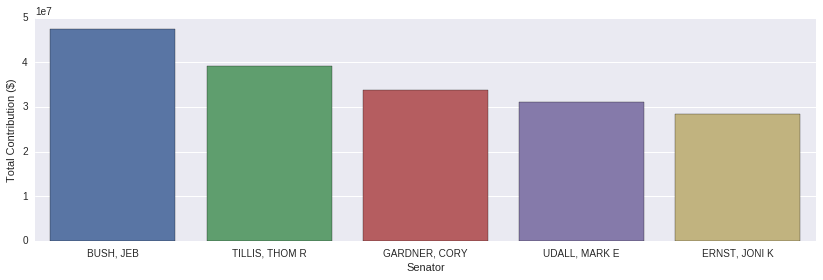

In [90]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_total[:5], amounts_total[:5])
plt.xlabel('Senator')
plt.ylabel('Total Contribution ($)')
plt.show()

In [91]:
mean_contributions = session.query(Candidate.name, func.avg(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_mean, amounts_mean = zip(*mean_contributions)

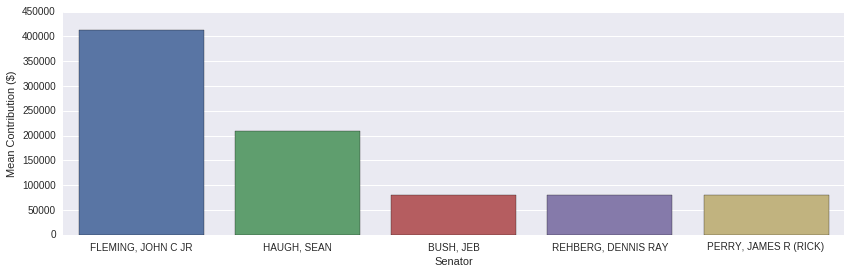

In [92]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_mean[:5], amounts_mean[:5])
plt.xlabel('Senator')
plt.ylabel('Mean Contribution ($)')
plt.show()

In [93]:
num_contributions = session.query(Candidate.name, func.count(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_num, amounts_num = zip(*num_contributions)

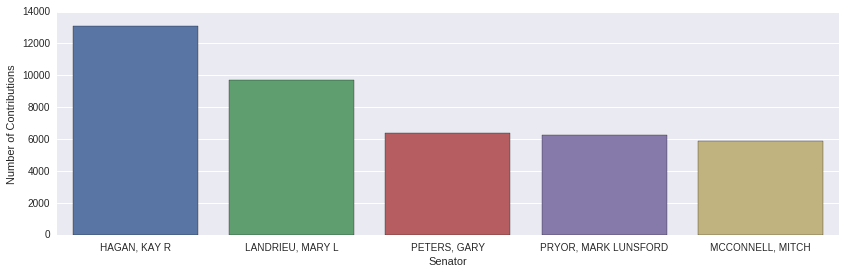

In [94]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_num[:5], amounts_num[:5])
plt.xlabel('Senator')
plt.ylabel('Number of Contributions')
plt.show()

In [150]:
import datetime
from datetime import date
import random

def dates_in_range(first_date, last_date):
    first = first_date.toordinal()
    last = last_date.toordinal()
    
    dates = []
    for i in range(first, last+1):
        d = date.fromordinal(i)
        dates.append(d)
        
    return dates

import numpy as np
from collections import OrderedDict

# Fill in zeros in some data data
def fill_date_data(dates, values, start_date=None, end_date=None):
    sorted_dates = sorted(dates)

    if start_date:
        first_date = start_date
    else:
        first_date = sorted_dates[0]
        
    if end_date:
        last_date = end_date
    else:
        last_date = sorted_dates[-1]
        
    all_dates = dates_in_range(first_date, last_date)

    zeros = np.zeros((len(all_dates),))
    all_dates_dict = OrderedDict(zip(all_dates, zeros))
    
    for (date, value) in zip(dates, values):
        if (date >= first_date and date <= last_date):
            all_dates_dict[date] = value
        
    return (all_dates_dict.keys(), all_dates_dict.values())

In [96]:
all_contributions = session.query(Contribution.tx_date, func.count(Contribution.tx_date)).\
                            group_by(Contribution.tx_date).\
                            filter(Contribution.tx_date != None).\
                            filter(Contribution.tx_date >= '2012-1-1').\
                            filter(Contribution.tx_date <= '2016-1-1').\
                            all()
        
dates, counts = zip(*all_contributions)

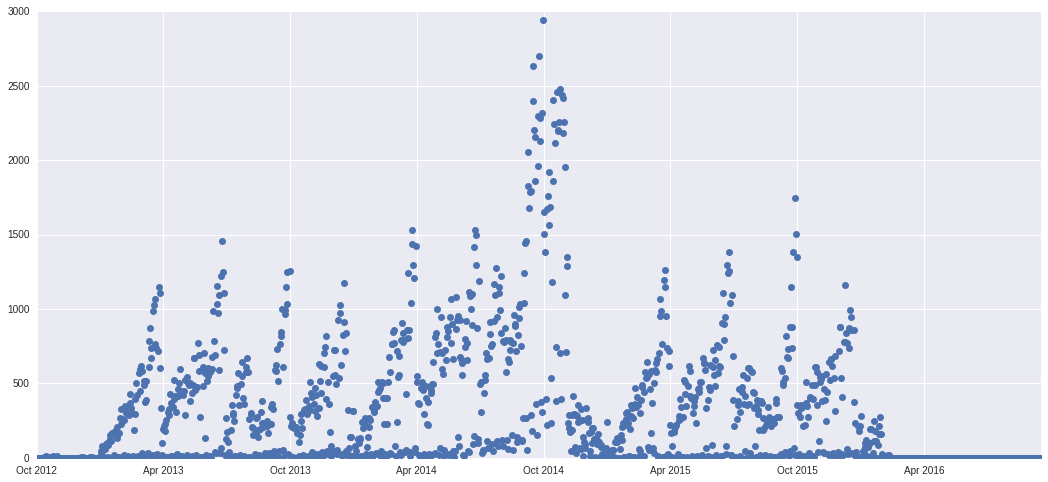

In [97]:
dates, counts = fill_date_data(dates, counts)
plt.figure(figsize=(18, 8))
plt.plot_date(dates, counts, fmt='o')
# plt.annotate()

In [98]:
def candidate_contributions_by_date(cand_id):
    contributions = session.query(Contribution.tx_date, func.count(Contribution.tx_date)).\
            group_by(Contribution.tx_date).\
            filter(Contribution.tx_date != None).\
            filter(Contribution.tx_date >= '2012-1-1').\
            filter(Contribution.candidate_id == cand_id).\
            all()
            
    dates, count = zip(*contributions)
    return fill_date_data(dates, count)

In [99]:
warren_id = 'S2MA00170'
warren_dates, warren_counts =  candidate_contributions_by_date(warren_id)
             
markey_id = 'H6MA07101'
markey_dates, markey_counts = candidate_contributions_by_date(markey_id)

sullivan_id = 'S4AK00214'
sullivan_dates, sullivan_counts = candidate_contributions_by_date(sullivan_id)

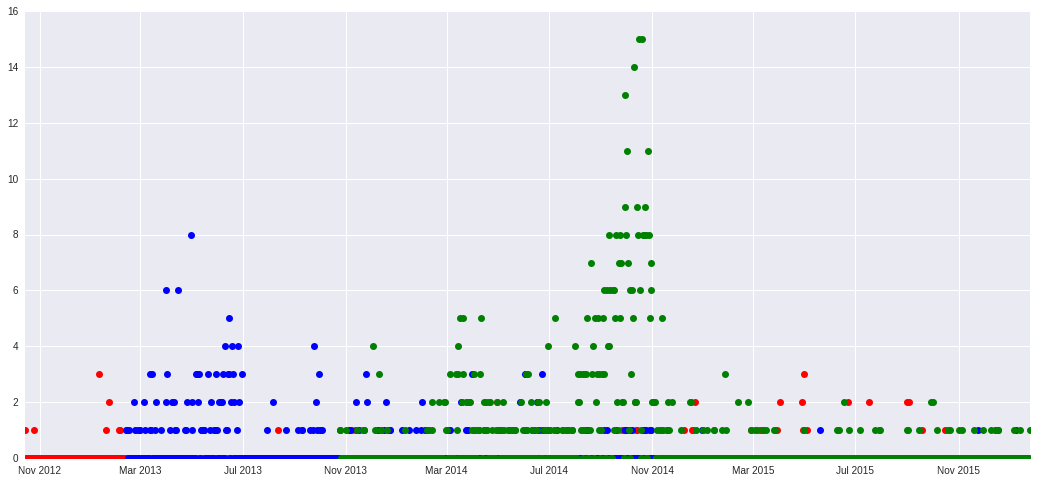

In [100]:
plt.figure(figsize=(18, 8))
plt.plot_date(warren_dates, warren_counts, fmt='ro')
plt.plot_date(markey_dates, markey_counts, fmt='bo')
plt.plot_date(sullivan_dates, sullivan_counts, fmt='go')

In [101]:
def candidate_dollars_by_date(cand_id):
    contributions = session.query(Contribution.tx_date, func.sum(Contribution.tx_amount)).\
            group_by(Contribution.tx_date).\
            filter(Contribution.tx_date != None).\
            filter(Contribution.tx_date >= '2012-1-1').\
            filter(Contribution.candidate_id == cand_id).\
            all()
            
    dates, dollars = zip(*contributions)
    return fill_date_data(dates, dollars)

In [102]:
def plot_canidate_contributions(cand_id, name=None):
    dates, dollars = candidate_dollars_by_date(cand_id)
    
    plt.figure(figsize=(16, 8))
    plt.plot_date(dates, dollars, fmt='go', alpha=0.4, label=name)

    election_day = datetime.date(2014, 11, 4)
    plt.axvline(election_day, color='black', ls='dashed', label='Election Day')
    # plt.annotate('Election Day', xy=(election_day, 500000))

    # plt.ylim(0, 50000)
    plt.ylabel('Contribution ($)')
    plt.legend(loc='upper left')
    plt.title('Daily Contributions')

In [103]:
# Freshman members of 114th congress
sullivan_id = 'S4AK00214'
cotton_id = 'H2AR04083'
gardner_id = 'H0CO04122'
perdue_id = 'S4GA11285'
ernst_id = 'S4IA00129'
peters_id = 'H8MI09068'
daines_id = 'H2MT01060'
sasse_id = 'S4NE00090'
tillis_id = 'S4NC00162'
lankford_id = 'H0OK05114'
rounds_id = 'S4SD00049'
capito_id = 'H0WV02138'

cand_ids = [sullivan_id, cotton_id, gardner_id, perdue_id, ernst_id, peters_id, daines_id, sasse_id, tillis_id, lankford_id, rounds_id, capito_id]
cand_names = ['Dan Sullivan (R-AK)', 'Thomas Cotton (R-AR)', 'Cory Gardner (R-CO)', 'David Perdue (R-GA)', 'Joni Ernst (R-IA)', 'Gary Peters (D-MI)', 'Steven Daines (R-MT)', 'Benjamin Sasse (R-NE)', 'Thom Tillis (R-NC)', 'James Paul Lankford (R-OK)', 'Mike Rounds (R-SD)', 'Shelley Moore Capito (R-WV)']
# for cand_id in cand_ids:
#     plot_canidate_contributions(cand_id)

In [104]:
plt.figure(figsize=(16, 8))

# Freshman senators
# plt.plot_date(sullivan_dates, sullivan_dollars, fmt='go', alpha=0.4, label='Dan Sullivan (R-AK)')
# plt.plot_date(peters_dates, peters_dollars, fmt='bo', alpha=0.4, label='Gary Peters (D-MI)')
# plt.plot_date(cotton_dates, cotton_dollars, fmt='ro', alpha=0.4, label='Thomas Cotton (R-AR)')
# plt.plot_date(gardner_dates, gardner_dollars, fmt='ro', alpha=0.4, label='Cory Gardner (R-CO)')
# plt.plot_date(perdue_dates, perdue_dollars, fmt='go', alpha=0.4, label='David Perdue (R-GA)')
# plt.plot_date(ernst_dates, ernst_dollars, color='orange', fmt='o', alpha=0.4, label='Joni Ernst (R-IA)')
# plt.plot_date(peters_dates, peters_dollars, color='orange', fmt='o', alpha=0.4, label='... Peters')
# plt.plot_date(daines_dates, daines_dollars, color='orange', fmt='o', alpha=0.4, label='... Daines')
# plt.plot_date(sasse_dates, sasse_dollars, color='orange', fmt='o', alpha=0.4, label='... Sasse')
# plt.plot_date(tillis_dates, tillis_dollars, color='orange', fmt='o', alpha=0.4, label='... Tillis)
# plt.plot_date(lankford_dates, lankford_dollars, color='orange', fmt='o', alpha=0.4, label='... Lankford)
# plt.plot_date(tillis_dates, tillis_dollars, color='orange', fmt='o', alpha=0.4, label='... Tillis)



# Gary peters
# plt.plot_date(warren_dates, warren_dollars, fmt='ro', alpha=0.4)
# plt.plot_date(markey_dates, markey_dollars, fmt='bo', alpha=0.4)
# plt.plot_date(sullivan_dates, sullivan_dollars, fmt='go', alpha=0.4, label='Dan Sullivan (R-AK)')
# plt.plot_date(peters_dates, peters_dollars, fmt='bo', alpha=0.4, label='Gary Peters (D-MI)')
# plt.plot_date(cotton_dates, cotton_dollars, fmt='ro', alpha=0.4, label='Thomas Cotton (R-AR)')
# plt.plot_date(gardner_dates, gardner_dollars, fmt='ro', alpha=0.4, label='Cory Gardner (R-CO)')
# plt.plot_date(perdue_dates, perdue_dollars, fmt='go', alpha=0.4, label='David Perdue (R-GA)')
# plt.plot_date(ernst_dates, ernst_dollars, color='orange', fmt='o', alpha=0.4, label='Joni Ernst (R-IA)')
# plt.plot_date(sanders_dates, sanders_dollars, color='orange', fmt='o', alpha=0.4, label='Bernie Sanders (D-VT)')
# plt.plot_date(cruz_dates, cruz_dollars, color='orange', fmt='o', alpha=0.4, label='Ted Cruz (D-TX)')


# election_day = datetime.date(2014, 11, 4)
# plt.axvline(election_day, color='black', ls='dashed', label='Election Day')
# plt.annotate('Election Day', xy=(election_day, 500000))

# plt.ylim(0, 50000)
# plt.ylabel('Contribution ($)')
# plt.legend(loc='upper left')
# plt.title('Daily Contributions')


# plt.plot_date(warren_dates, warren_dollars, fmt='r-', alpha=0.4)
# plt.plot_date(markey_dates, markey_dollars, fmt='b-', alpha=0.4)
# plt.plot_date(sullivan_dates, sullivan_dollars, fmt='g-', alpha=0.4)

In [105]:
def bin_monthly(dates, values):
    months = []
    bin_values = []
    current_value = 0
    current_month = dates[0].month
   
    for (index, date) in enumerate(dates):
        if date.month == current_month:
            current_value += values[index]
        else:
            bin_values.append(current_value)
            months.append(date.strftime('%B %Y'))
            
            current_month = date.month
            current_value = values[index]
            
    bin_values.append(current_value)
    months.append(date.strftime('%B %Y'))
    
    return (months, bin_values)

sullivan_dates, sullivan_dollars = candidate_dollars_by_date(sullivan_id)
months, totals = bin_monthly(sullivan_dates, sullivan_dollars)
print months

['November 2013', 'December 2013', 'January 2014', 'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014', 'July 2014', 'August 2014', 'September 2014', 'October 2014', 'November 2014', 'December 2014', 'January 2015', 'February 2015', 'March 2015', 'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015', 'September 2015', 'October 2015', 'November 2015', 'December 2015', 'January 2016', 'January 2016']


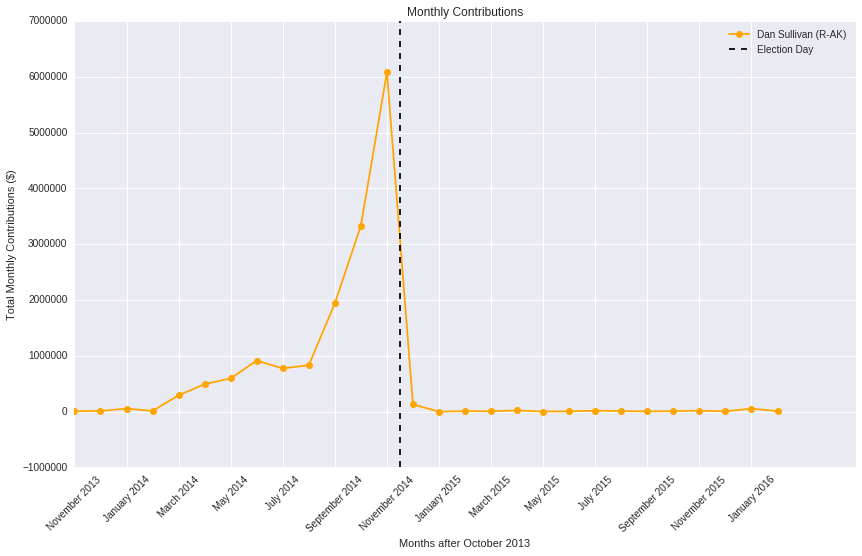

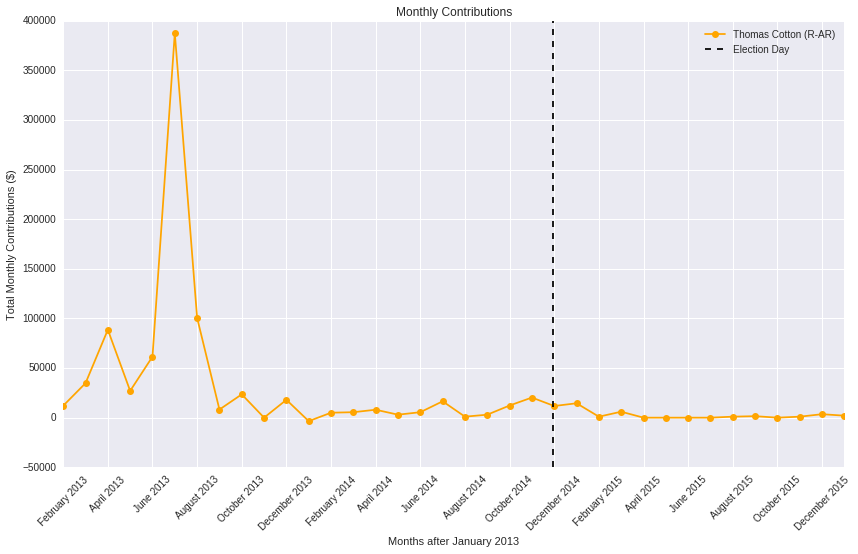

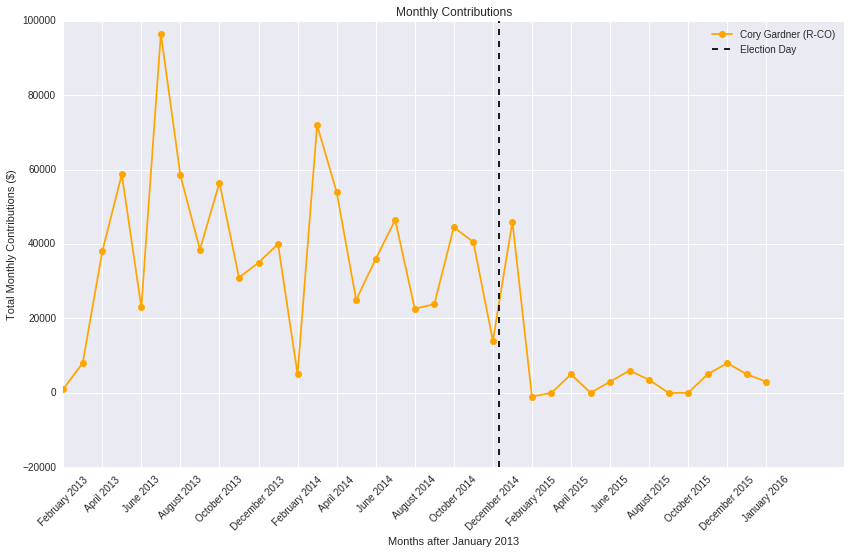

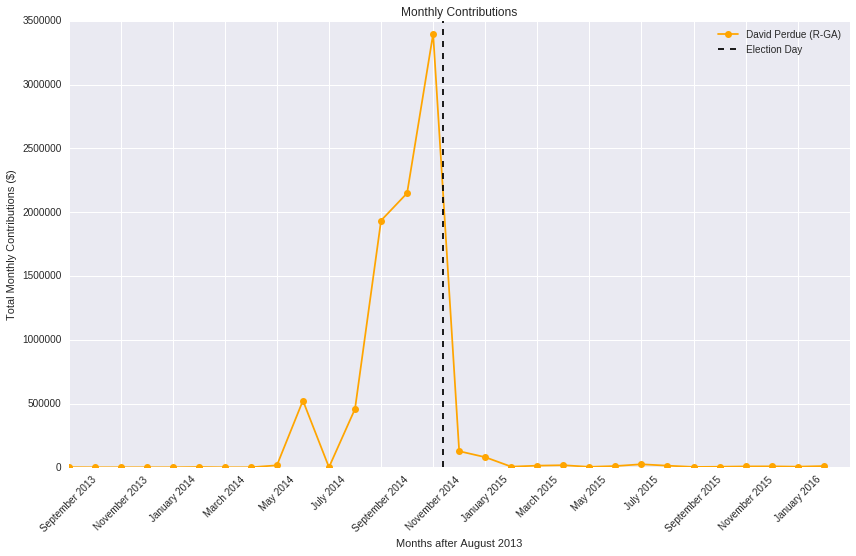

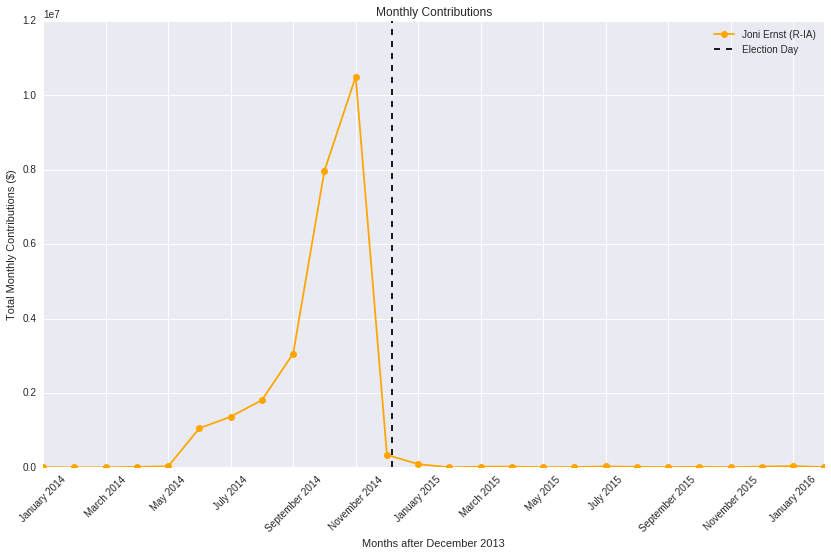

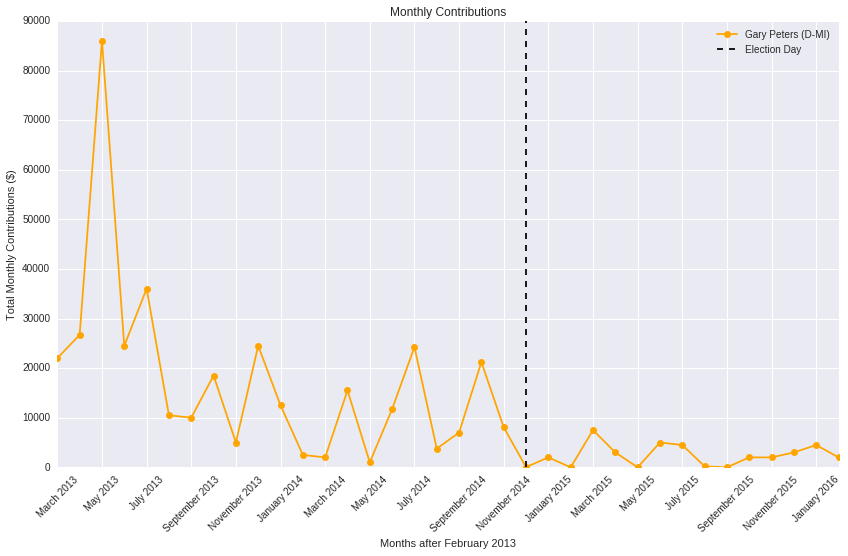

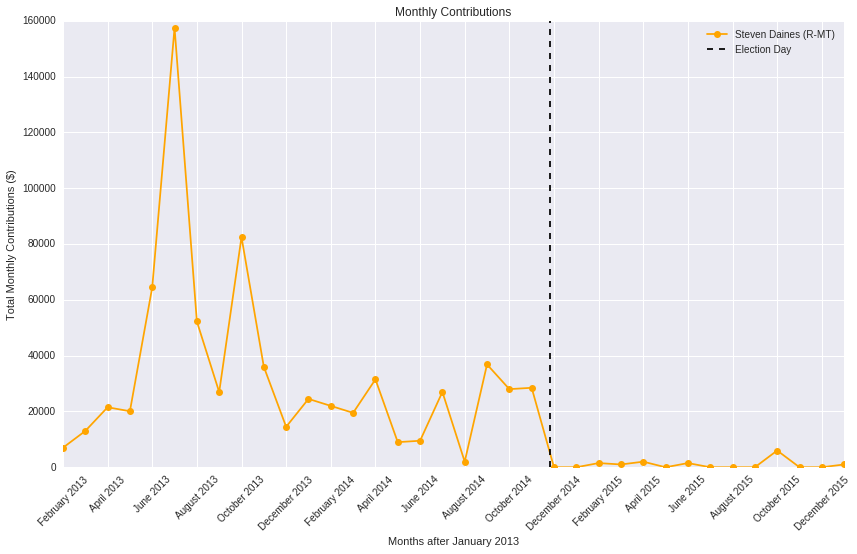

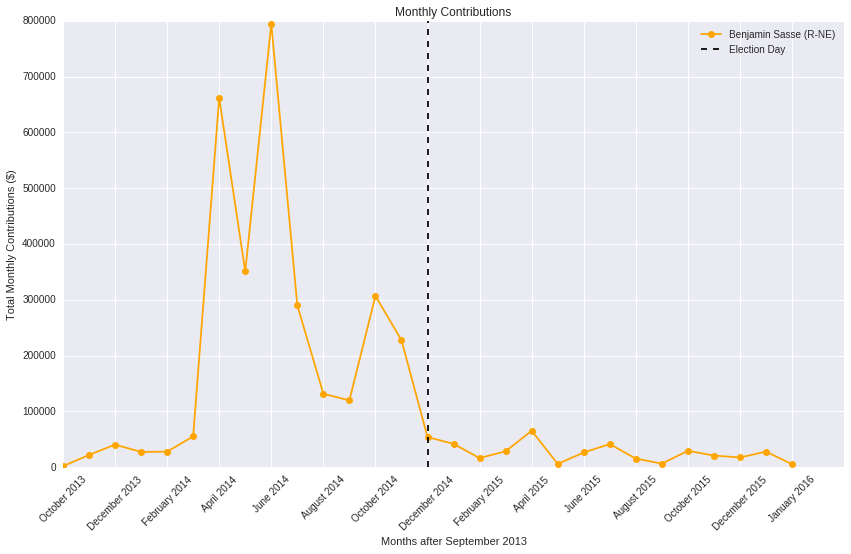

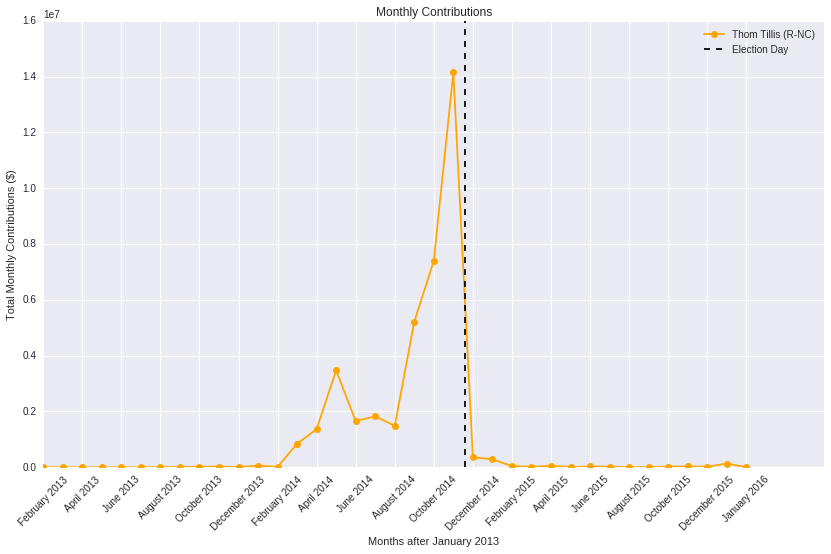

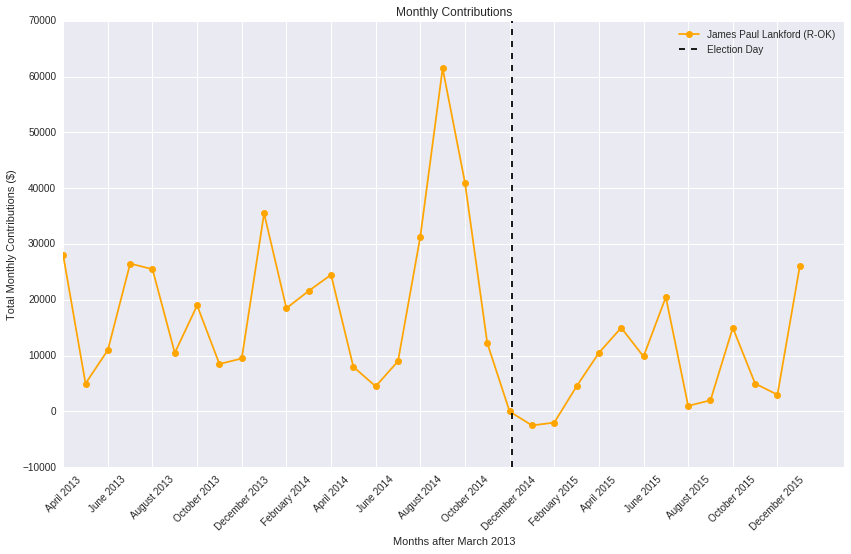

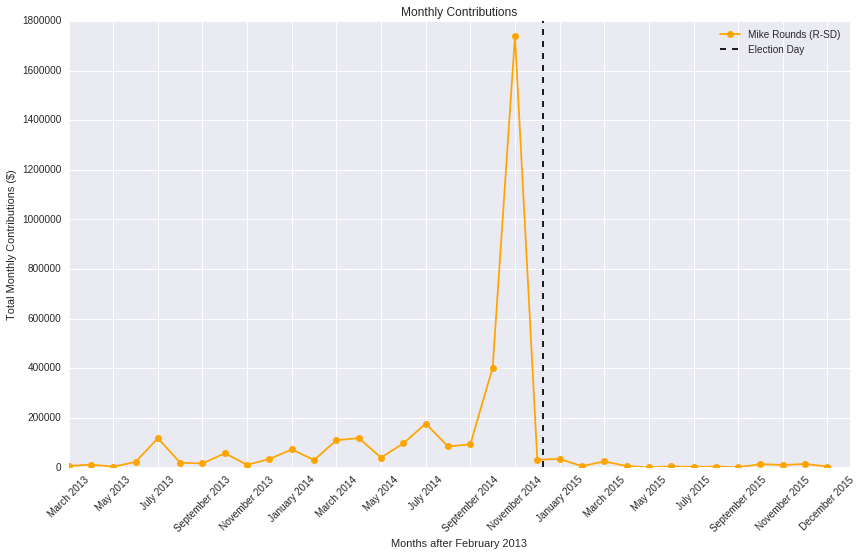

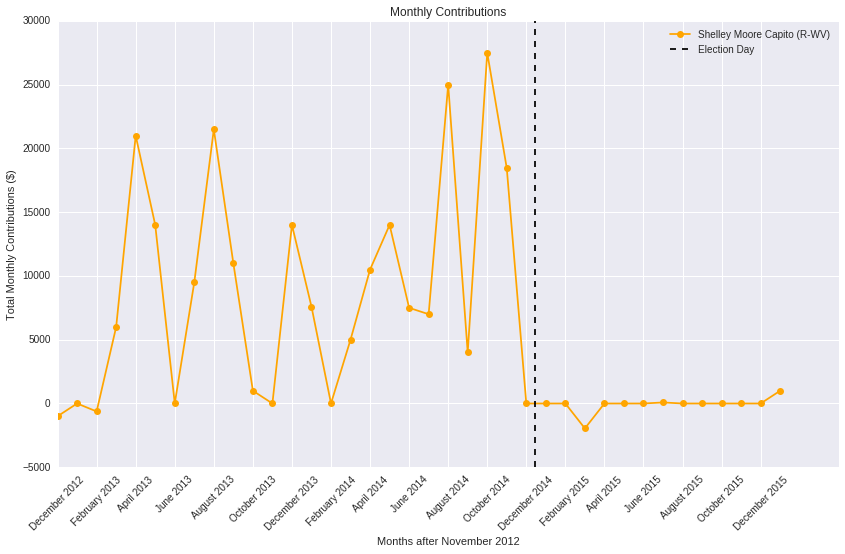

In [106]:
def plot_monthly_contributions(cand_id, cand_name=None, color='blue'):
    dates, dollars = candidate_dollars_by_date(cand_id)
    months, dollars = bin_monthly(dates, dollars)
        
    plt.figure(figsize=(14, 8))
    plt.plot(range(len(months)), dollars, 'o-', color=color, label=cand_name)
    
    xtick_labels = months[::2]
    xticks_locs = range(0, len(months), 2)
    plt.xticks(xticks_locs, xtick_labels, rotation=45)

    election_day = datetime.date(2014, 11, 4)
    start_date = dates[0]
    election_dist = election_day - start_date
    election_mark = election_dist.days / 30.0

    plt.axvline(election_mark, color='black', ls='dashed', label='Election Day')

    start_date = dates[0].strftime("%B %Y")
    plt.xlabel('Months after ' + start_date)
    plt.ylabel('Total Monthly Contributions ($)')
    plt.legend(loc='upper right')
    plt.title('Monthly Contributions')

for (cand_id, cand_name) in zip(cand_ids, cand_names):
    plot_monthly_contributions(cand_id, cand_name=cand_name, color='orange')

In [162]:
def bin_monthly_date(dates, values):
    months = []
    monthly_values = []
    current_month = 0
   
    for (date, value) in zip(dates, values):
        if date.month == current_month:
            monthly_values[-1] = monthly_values[-1] + value
        else:
            monthly_values.append(value)
            months.append(datetime.date(date.year, date.month, 1))            
            current_month = date.month
            
    return (months, monthly_values)

def party_dollars_by_date(party):
    contributions = session.query(Contribution.tx_date, func.sum(Contribution.tx_amount)).\
            group_by(Contribution.tx_date).\
            join(Candidate).\
            filter(Candidate.party == party).\
            filter(Contribution.tx_date != None).\
            filter(Contribution.tx_date >= '2012-1-1').\
            filter(Contribution.tx_date < '2016-1-1').\
            all()
                        
    dates, dollars = zip(*contributions)
    return fill_date_data(dates, dollars, start_date=datetime.date(2012, 11, 1), end_date=datetime.date(2015, 11, 1))

def plot_party_monthly_contributions(party, color='blue', election_mark=True):
    dates, dollars = party_dollars_by_date(party)
    months, dollars = bin_monthly_date(dates, dollars)
        
#     plt.figure(figsize=(14, 8))
    plt.plot(range(len(months)), dollars, 'o-', color=color, label=party)
    
    xtick_labels = [d.strftime('%B %Y') for d in months[::2]]
    xticks_locs = range(0, len(months), 2)
    plt.xticks(xticks_locs, xtick_labels, rotation=75)
    
    a = plt.gca()
    a.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    if election_mark:
        election_day = datetime.date(2014, 11, 4)
        start_date = months[0]
        election_dist = election_day - start_date
        election_mark = election_dist.days / 30.0

        plt.axvline(election_mark, color='black', ls='dashed', label='Election Day')

    start_date = dates[0].strftime("%B %Y")
    plt.ylabel('Total Monthly Contributions ($)')
    plt.legend(loc='upper right')
    plt.title('Monthly Contributions')

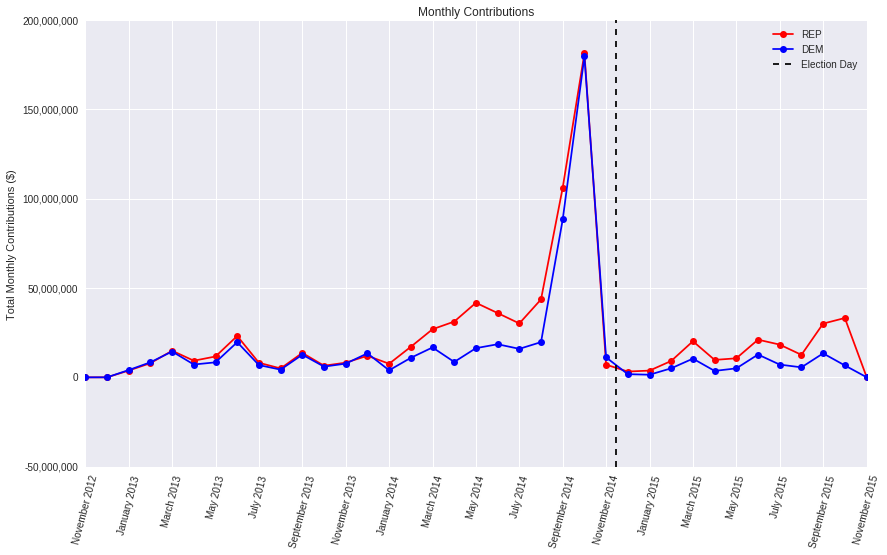

In [163]:
plt.figure(figsize=(14, 8))
plot_party_monthly_contributions('REP', color='red', election_mark=False)
plot_party_monthly_contributions('DEM', color='blue', election_mark=True)
# plot_party_monthly_contributions('IND', color='purple', election_mark=True)